In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
only_zeros=x_train[y_train==0]

In [5]:
import tensorflow as tf

In [6]:
batch_size=32

In [7]:
datasets=tf.data.Dataset.from_tensor_slices(only_zeros).prefetch(1)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [8]:
dataset=datasets.batch(batch_size,drop_remainder=True).shuffle(buffer_size=1000)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape

In [12]:
discriminator=Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(400,activation='relu'))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.compile(optimizer='adam',loss='binary_crossentropy')

In [13]:
coding_size=100

In [14]:
generator=Sequential()
generator.add(Dense(100,activation='relu',input_shape=[coding_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(400,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [15]:
discriminator.trainable=False

In [16]:
GAN=Sequential([generator,discriminator])

In [17]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [18]:
epochs=1

In [21]:
generator,discriminator=GAN.layers
for epoch in range(epochs):
    x=0
    for x_batch in dataset:
        x+=1
        noise=tf.random.normal([batch_size,coding_size])
        gen=generator(noise)
        real_vs_fake=tf.concat([gen,tf.dtypes.cast(x_batch,tf.float32)],axis=0)
        y1=tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)
        discriminator.trainable=True
        discriminator.train_on_batch(real_vs_fake,y1)
        discriminator.trainable=False
        noise=tf.random.normal([batch_size,coding_size])
        y2=tf.constant([[1.0]]*batch_size)
        GAN.train_on_batch(noise,y2)

2023-04-14 21:15:46.111364: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [22]:
noise=tf.random.normal([10,coding_size])

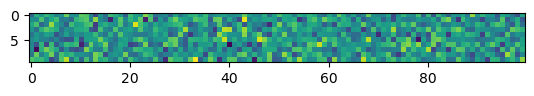

In [23]:
plt.imshow(noise)

In [24]:
image=generator(noise)

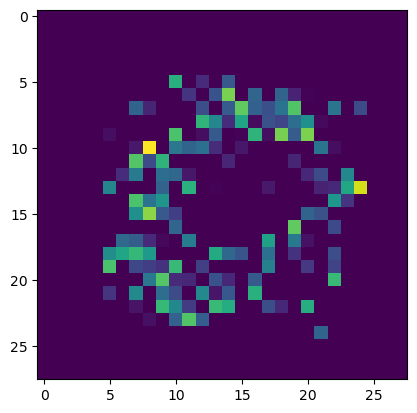

In [26]:
plt.imshow(image[0])